In [1]:
import numpy as np
import matplotlib.pyplot as plt

## load data

In [6]:
EEG_c1=np.load('../data/EEG_class1.npy')
EEG_c2=np.load('../data/EEG_class2.npy')

## Plot signal in time series 

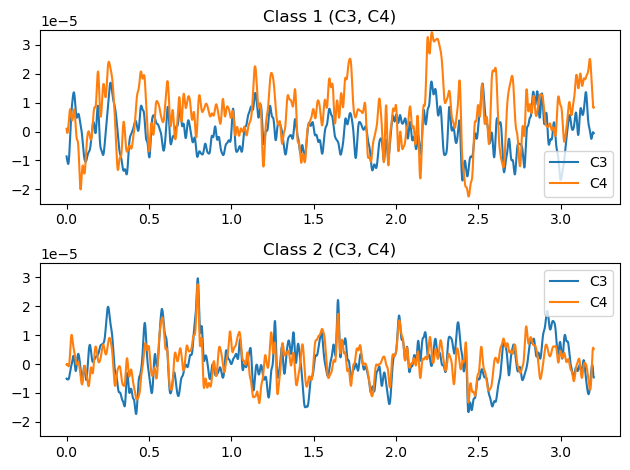

In [7]:
time=np.arange(0,3.2,3.2/EEG_c1.shape[1])
plt.subplots(2,1)
plt.subplot(2,1,1)
plt.plot(time[:-1],EEG_c1[0], label='C3')
plt.plot(time[:-1],EEG_c1[1], label='C4')
plt.title("Class 1 (C3, C4)")
plt.ylim(-2.5e-5,3.5e-5)
plt.legend()
plt.subplot(2,1,2)
plt.plot(time[:-1],EEG_c2[0], label='C3')
plt.plot(time[:-1],EEG_c2[1], label='C4')
plt.title("Class 2 (C3, C4)")
plt.ylim(-2.5e-5,3.5e-5)
plt.legend()
plt.tight_layout()
plt.show()

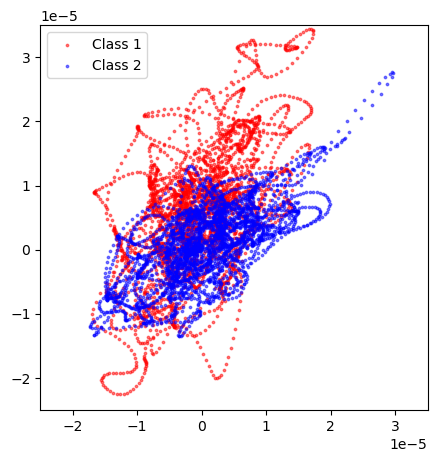

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(EEG_c1[0],EEG_c1[1],color = 'r',s=3,label='Class 1', alpha=1/2)
plt.scatter(EEG_c2[0],EEG_c2[1],color = 'b',s=3,label='Class 2', alpha=1/2)
plt.ylim(-2.5e-5,3.5e-5)
plt.xlim(-2.5e-5,3.5e-5)
plt.legend()
plt.show()

## PCA for both classes

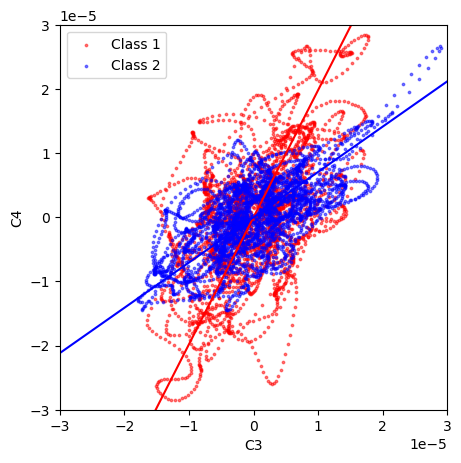

In [22]:
EEG_c1_center = EEG_c1.T - np.mean(EEG_c1, axis=1)
EEG_c1_center = EEG_c1_center.T
EEG_c2_center = EEG_c2.T - np.mean(EEG_c2, axis=1)
EEG_c2_center = EEG_c2_center.T
cov_data_c1=np.cov(EEG_c1_center)
cov_data_c2=np.cov(EEG_c2_center)
evalue_c1, evect_c1 = np.linalg.eig(cov_data_c1)
evalue_c2, evect_c2 = np.linalg.eig(cov_data_c2)

n_features=EEG_c1_center.shape[0]
k=1

eig_pairs_c1 = [(np.abs(evalue_c1[i]), evect_c1[:,i]) for i in range(n_features)]
eig_pairs_c1.sort(reverse=True)
feature_c1=np.array([ele[1] for ele in eig_pairs_c1[:k]])

eig_pairs_c2 = [(np.abs(evalue_c2[i]), evect_c2[:,i]) for i in range(n_features)]
eig_pairs_c2.sort(reverse=True)
feature_c2=np.array([ele[1] for ele in eig_pairs_c2[:k]])

plt.figure(figsize=(5,5))
plt.axline((0,0),(feature_c1[0,0],feature_c1[0,1]), color="r")
plt.axline((0,0),(feature_c2[0,0],feature_c2[0,1]), color="b")
plt.scatter(EEG_c1_center[0],EEG_c1_center[1],color = 'r',s=3,alpha=1/2,label='Class 1')
plt.scatter(EEG_c2_center[0],EEG_c2_center[1],color = 'b',s=3, alpha=1/2,label='Class 2')
plt.ylim(-3e-5,3e-5)
plt.xlim(-3e-5,3e-5)
plt.xlabel('C3')
plt.ylabel('C4')
plt.legend()
plt.show()

## whitening matrix

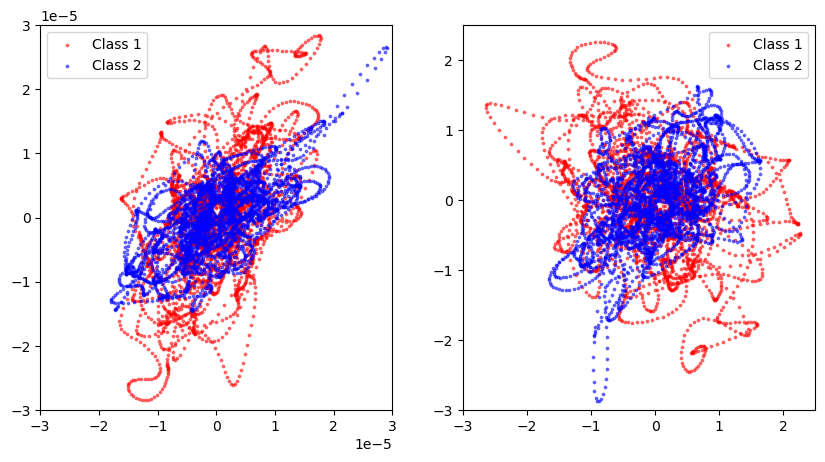

In [10]:
EEG_c1_center = EEG_c1.T - np.mean(EEG_c1, axis=1)
EEG_c1_center = EEG_c1_center.T
EEG_c2_center = EEG_c2.T - np.mean(EEG_c2, axis=1)
EEG_c2_center = EEG_c2_center.T
cov_data_c1=np.cov(EEG_c1_center)
cov_data_c2=np.cov(EEG_c2_center)
cov_data_comb=cov_data_c1+cov_data_c2
evalue_c, evect_c = np.linalg.eig(cov_data_comb)

diagw = np.diag(1/(evalue_c**0.5)) 
# diagw = diagw.real.round(4) #convert to real and round off

# Whitening transform using PCA (Principal Component Analysis)
P=np.dot(diagw, evect_c.T)

wpca_c1 = np.dot(P, EEG_c1_center)
wpca_c2 = np.dot(P, EEG_c2_center)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(EEG_c1_center[0],EEG_c1_center[1],color = 'r',s=3,alpha=1/2, label='Class 1')
plt.scatter(EEG_c2_center[0],EEG_c2_center[1],color = 'b',s=3, alpha=1/2, label='Class 2')
plt.ylim(-3e-5,3e-5)
plt.xlim(-3e-5,3e-5)
plt.legend()
plt.subplot(1,2,2)
plt.scatter(wpca_c1[0,:],wpca_c1[1,:],color = 'r',s=3,alpha=1/2, label='Class 1')
plt.scatter(wpca_c2[0,:],wpca_c2[1,:],color = 'b',s=3, alpha=1/2, label='Class 2')
plt.ylim(-3,2.5)
plt.xlim(-3,2.5)
plt.legend()
plt.show()

## Calculate spatial filter

[0.78868819 0.42756458]
[[ 0.71406373  0.7000807 ]
 [-0.7000807   0.71406373]]
[0.21131181 0.57243542]
[[-0.71406373 -0.7000807 ]
 [ 0.7000807  -0.71406373]]
[[  47600.79501794  110995.07763038]
 [-103748.28715436  -20417.04999334]]


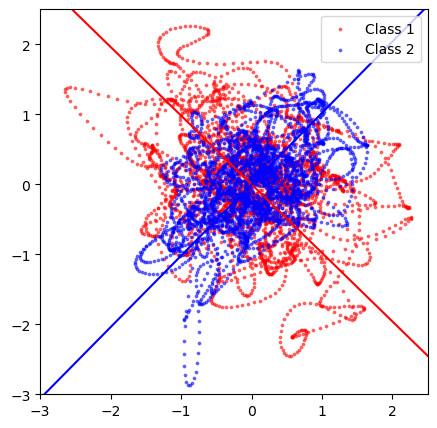

In [11]:
S_c1=np.dot(np.dot(P,cov_data_c1),P.T)
S_c2=np.dot(np.dot(P,cov_data_c2),P.T)
evalue_c1_1, evect_c1_1 = np.linalg.eig(S_c1)
evalue_c2_1, evect_c2_1 = np.linalg.eig(S_c2)
print(evalue_c1_1)
print(evect_c1_1)
print(evalue_c2_1)
print(evect_c2_1)
W=np.dot(P.T,evect_c2_1)
print(W)

plt.figure(figsize=(5,5))
plt.axline((0,0),(evect_c1_1[0,0],evect_c1_1[1,0]), color="r")
plt.axline((0,0),(evect_c1_1[0,1],evect_c1_1[1,1]), color="b")
plt.scatter(wpca_c1[0,:],wpca_c1[1,:],color = 'r',s=3,alpha=1/2, label='Class 1')
plt.scatter(wpca_c2[0,:],wpca_c2[1,:],color = 'b',s=3, alpha=1/2, label='Class 2')
plt.ylim(-3,2.5)
plt.xlim(-3,2.5)
plt.legend()
plt.show()

## project data through spatial filter

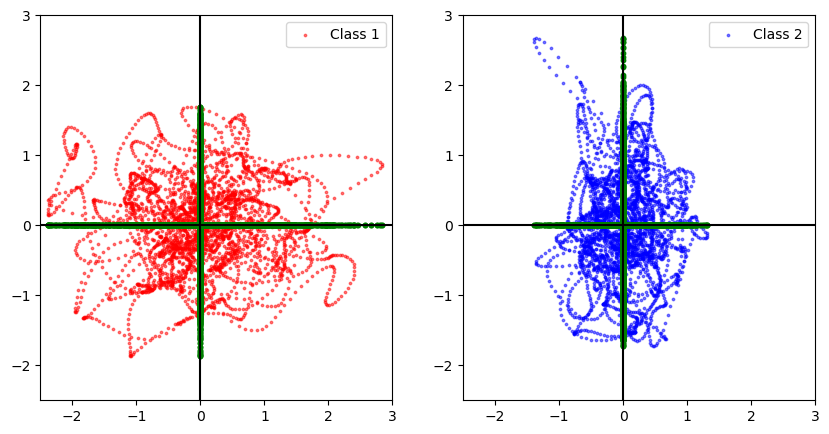

In [12]:
WTX_c1=np.dot(W.T,EEG_c1_center)
WTX_c2=np.dot(W.T,EEG_c2_center)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axline((0,0),(1,0), color="black")
plt.axline((0,0),(0,1), color="black")
plt.scatter(WTX_c1[0,:],WTX_c1[1,:],color = 'r',s=3,alpha=1/2, label='Class 1')
plt.scatter(WTX_c1[0,:],np.zeros(len(WTX_c1[1,:])),color = 'g',s=10)
plt.scatter(np.zeros(len(WTX_c1[0,:])),WTX_c1[1,:],color = 'g',s=10)
plt.xlim([-2.5,3])
plt.ylim([-2.5,3])
plt.legend()
plt.subplot(1,2,2)
plt.axline((0,0),(1,0), color="black")
plt.axline((0,0),(0,1), color="black")
plt.scatter(WTX_c2[0,:],WTX_c2[1,:],color = 'b',s=3, alpha=1/2, label='Class 2')
plt.scatter(WTX_c2[0,:],np.zeros(len(WTX_c2[1,:])),color = 'g',s=10)
plt.scatter(np.zeros(len(WTX_c2[0,:])),WTX_c2[1,:],color = 'g',s=10)
plt.xlim([-2.5,3])
plt.ylim([-2.5,3])
plt.legend()
plt.show()

## calculate features for classification

[-0.43315886 -1.04542458]
[-1.31075175 -0.31418663]


C:\Users\xz449\AppData\Local\Temp\ipykernel_32144\1640698742.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_yticklabels(['']+alphabets)


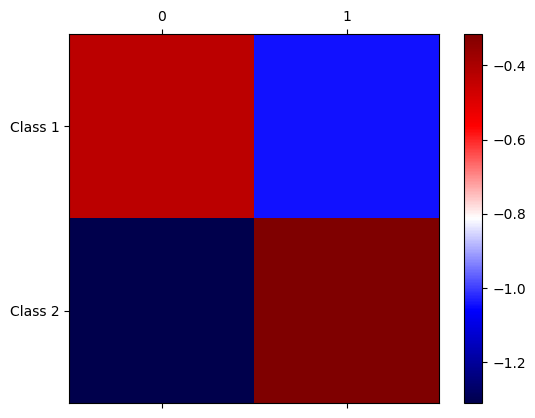

In [15]:
WTXXTW_c1=np.dot(np.dot(np.dot(W.T,EEG_c1_center),EEG_c1_center.T),W)
WTXXTW_c2=np.dot(np.dot(np.dot(W.T,EEG_c2_center),EEG_c2_center.T),W)
spatial_feature_c1=np.log(np.diag(WTXXTW_c1)/np.trace(WTXXTW_c1))
spatial_feature_c2=np.log(np.diag(WTXXTW_c2)/np.trace(WTXXTW_c2))
print(spatial_feature_c1)
print(spatial_feature_c2)
SF_Mtx=np.array([spatial_feature_c1,spatial_feature_c2])

alphabets = ['Class 1', 'Class 2']

figure = plt.figure()
axes = figure.add_subplot(111)
 
# using the matshow() function 
caxes = axes.matshow(SF_Mtx, interpolation ='nearest', cmap=plt.cm.seismic)
figure.colorbar(caxes)
 
# axes.set_xticklabels(['']+alphabets)
axes.set_yticklabels(['']+alphabets)

plt.show()